<a href="https://colab.research.google.com/github/bilalsarimeseli/Linear_Regression_Cost_Function/blob/main/Linear_Regression_Cost_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cost Function 
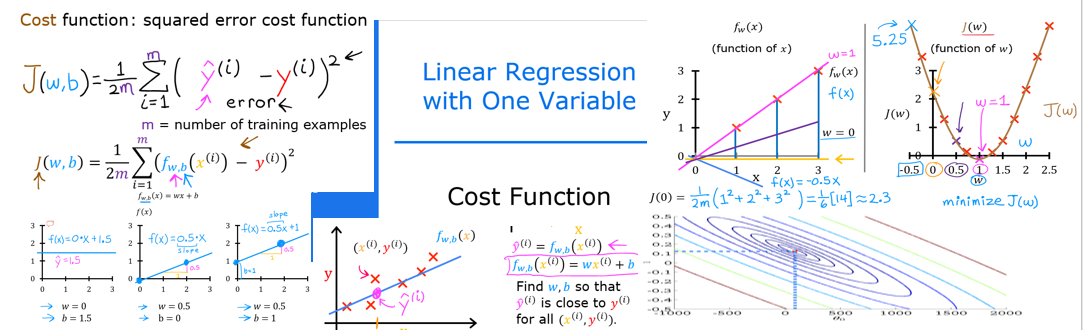

**Image by Andrew Ng**



## Goals

- I will implement and explore a basic `cost` function for linear regression with one variable. 


## Tools
We will make use of: 
- NumPy, our popular library for scientific computing
- Matplotlib, for plotting data
- local plotting routines in the lab_utils_uni.py file in the local directory

In [67]:
pip install lab-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
from google.colab import files
src = list(files.upload().values())[0]
open('lab_utils_uni.py','wb').write(src)
import lab_utils_uni

Saving lab_utils_uni.py to lab_utils_uni (1).py


In [70]:
from google.colab import files
src = list(files.upload().values())[0]
open('deepleaerning.mplstyle','wb').write(src)
import deeplearning.mplstyle

Saving deeplearning.mplstyle to deeplearning (2).mplstyle


ModuleNotFoundError: ignored

In [71]:
from google.colab import files
src = list(files.upload().values())[0]
open('lab_utils_common.py','wb').write(src)
import lab_utils_common

Saving lab_utils_common.py to lab_utils_common (1).py


In [72]:
pip install ipympl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
import numpy as np
%matplotlib widget
import psycopg2
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('./deeplearning.mplstyle')

In [74]:
pip install lab-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
pip install psycopg2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [76]:
 pip install psycopg2-binary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
pip install lab-utils --only-binary psycopg2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Problem Statement

Let's make a simplistic model which can predict housing prices given the size of the house.  
Let's usetwo data points as a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.


| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1                 | 300                      |
| 2                  | 500                      |


In [78]:
x_train = np.array([1.0, 2.0])           #(size in 1000 square feet)
y_train = np.array([300.0, 500.0])           #(price in 1000s of dollars)

## Computing Cost
The term 'cost' might be a little confusing since the data is housing cost. Here, **`cost`** is a measure how well our model is predicting the target price of the house, therefore the term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is the prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- We sum these differences over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  
>Note, the summation ranges are typically from 1 to m, while code will be from 0 to m-1.


Now, let's calculate cost by looping over each example. In each loop:
- `f_wb`, a prediction is calculated
- the difference between the target and the prediction is calculated and squared.
- this is added to the total cost.

In [79]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

## Cost Function Intuition

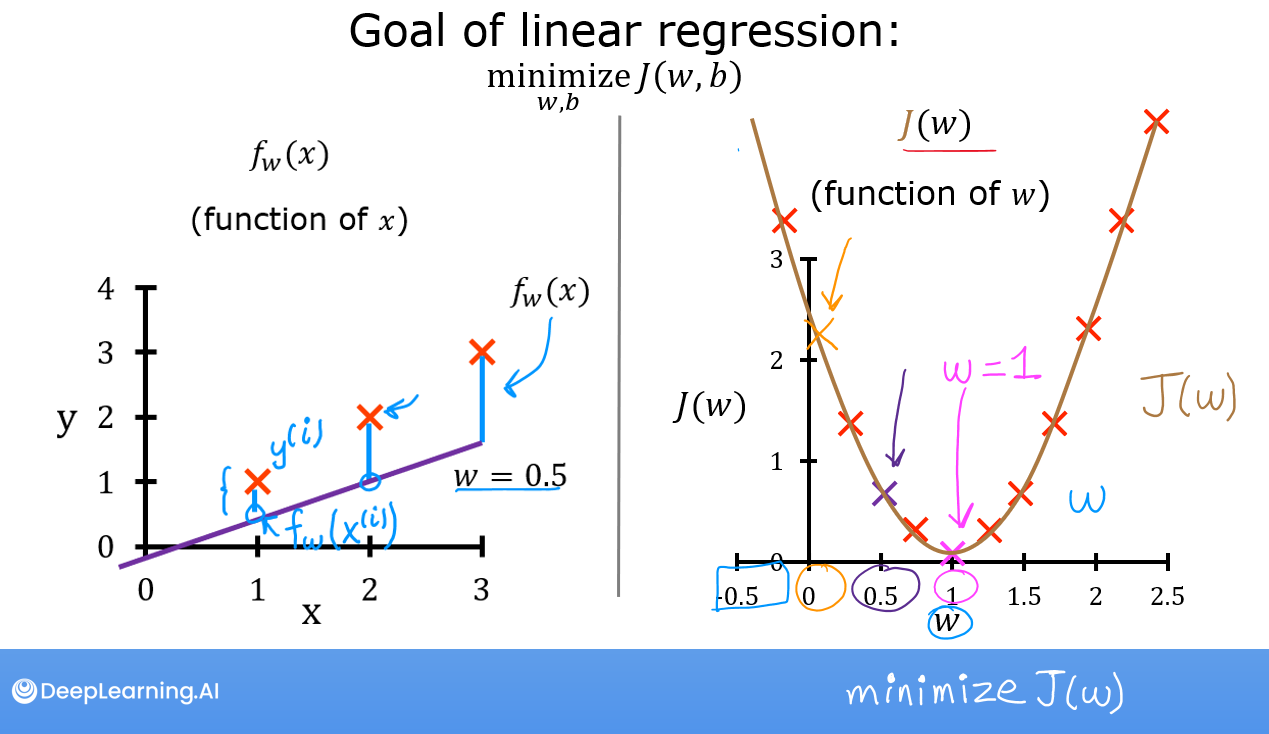  Our main goal is to find a model $f_{w,b}(x) = wx + b$, with parameters $w,b$,  which will accurately predict house values given an input $x$. The cost is a measure of how accurate the model is on the training data. 

The cost equation (1) above shows that if $w$ and $b$ can be selected such that the predictions $f_{w,b}(x)$ match the target data $y$, the $(f_{w,b}(x^{(i)}) - y^{(i)})^2 $ term will be zero and the cost minimized.

Below, using the slider control, we can select the value of $w$ that minimizes cost. It can take a few seconds for the plot to update.

In [60]:
plt_intuition(x_train,y_train)

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

The plot contains a few points that are worth mentioning.
- cost is minimized when $w = 200$, which matches results from the previous lab
- Because the difference between the target and pediction is squared in the cost equation, the cost increases rapidly when $w$ is either too large or too small.
- Using the `w` and `b` selected by minimizing cost results in a line which is a perfect fit to the data.

### Larger Data Set
Of course, it is more realistic to view a scenario with more data points. The new data set includes data points that do not fall on the same line.  
- What does that mean for the cost equation?  
- Can we find $w$, and $b$ that will give us a cost of 0? 

In [80]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

In the contour plot, click on a point to select `w` and `b` to achieve the lowest cost. This can take a few seconds to update the graph. 

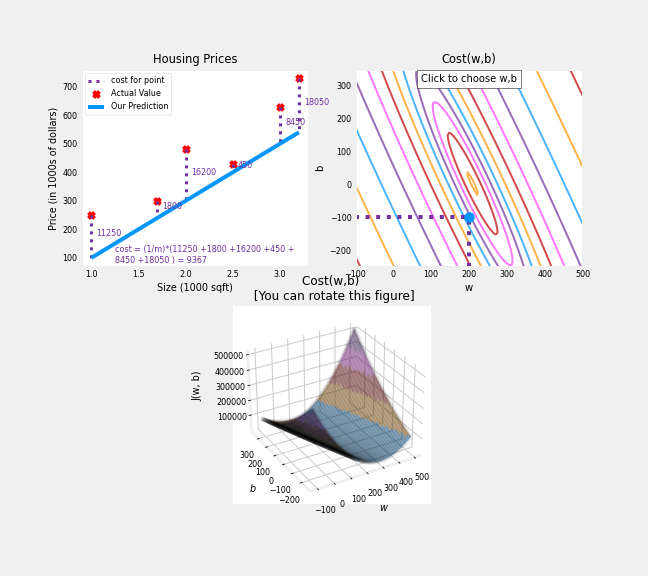

In [81]:
plt.close('all') 
fig, ax, dyn_items = plt_stationary(x_train, y_train)
updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)

Above, note the dashed lines in the left plot. These represent the portion of the cost contributed by each example in your training set. In this case, values of approximately $w=209$ and $b=2.4$ provide low cost. Note that, because our training examples are not on a line, the minimum cost is not zero.

### Convex Cost surface
The fact that the cost function squares the loss ensures that the 'error surface' is convex like a soup bowl. It will always have a minimum that can be reached by following the gradient in all dimensions. In the previous plot, because the $w$ and $b$ dimensions scale differently, this is not easy to recognize. The following plot, where $w$ and $b$ are symmetric.

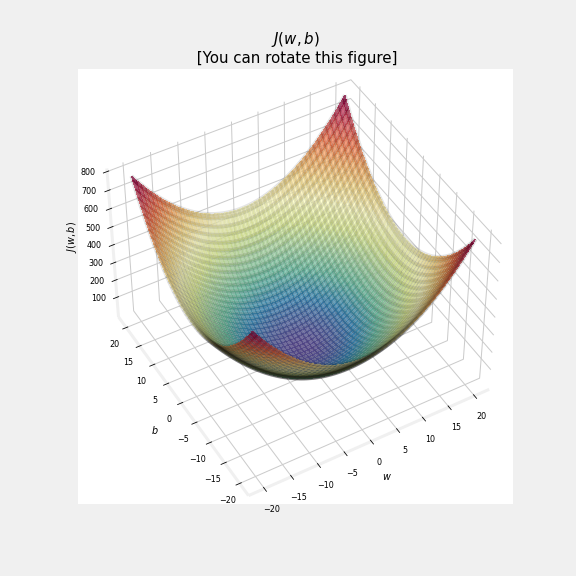

In [82]:
soup_bowl()

In [65]:
from google.colab import output
output.enable_custom_widget_manager()

# Conclusion:
 - The cost equation provides a measure of how well your predictions match our training data.
 - Minimizing the cost can provide optimal values of $w$, $b$.